# Mildew read - genome coverage 

Notes here - https://docs.google.com/document/d/1UwfG-clsAUK8n0zq_ujWmCMoOYx3PKVOOspuUA4Audg/edit?tab=t.srzi3n7b5wr5
Looking at the output from the emergent pathogen pipeline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
coverage = pd.read_csv('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Tiptree/Mildew/Pipeline_Output/genome_coverage_all.txt', sep='\t')  

NameError: name 'pd' is not defined

## Coverage
Pick out other taxa with high coverage
Plot average coverage for 3 taxa I am interested in (Strawberry genome is not in the reference database I used)
- P aphanis 79252
- B graminis 34373
- E necator 52586



In [ ]:
coverage.describe()

,Barcode,taxaID,mapped_bases,genome_length,coverage_percentage,num_reads
count,6781.000000,6.781000e+03,6.781000e+03,6.781000e+03,6781.000000,6781.000000
mean,23.531190,3.240203e+05,5.388387e+04,5.040837e+07,0.105910,67.172246
std,13.332434,5.156323e+05,6.854557e+05,6.581204e+07,1.232834,859.315254
min,1.000000,4.300000e+01,3.010000e+02,7.905170e+05,0.000000,1.000000
25%,12.000000,5.693000e+03,9.640000e+02,3.103646e+07,0.003200,2.000000
50%,23.000000,8.427500e+04,3.376000e+03,3.866458e+07,0.010600,5.000000
75%,35.000000,3.320340e+05,1.343400e+04,5.238704e+07,0.034400,17.000000
max,48.000000,2.813651e+06,2.182008e+07,1.016258e+09,39.240800,27357.000000


In [ ]:
# Filter to see taxa with high coverage (Average 0.1, max is 39)
coverage.sort_values(by='coverage_percentage', ascending=False).head(11)

In [24]:
# Filter to the taxaID of interest
taxaIDs = [79252, 34373, 52586, 3747]
filtered_coverage = coverage[coverage['taxaID'].isin(taxaIDs)]
#Group and calculate average 
avg_coverage = filtered_coverage.groupby('taxaID').mean()
avg_coverage = filtered_coverage.reset_index()
avg_coverage

,index,Barcode,taxaID,mapped_bases,genome_length,coverage_percentage,num_reads
0,0,1,79252,2198,55605580,0.0040,2
1,2,2,79252,4799,55605580,0.0086,6
2,46,3,79252,9509697,55605580,17.1021,11567
3,54,3,34373,107967,141403166,0.0764,98
4,55,3,52586,74599,80917019,0.0922,68
...,...,...,...,...,...,...,...
130,6470,46,52586,91740,80917019,0.1134,81
131,6636,47,79252,14040319,55605580,25.2498,16924
132,6637,47,52586,107279,80917019,0.1326,101
133,6643,47,34373,113578,141403166,0.0803,120


/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_86512/796211773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_coverage['Species'] = filtered_coverage['taxaID'].map({79252: 'P_aphanis', 34373: 'B_graminis', 52586: 'E necator'})


Text(0.5, 0, 'Species')

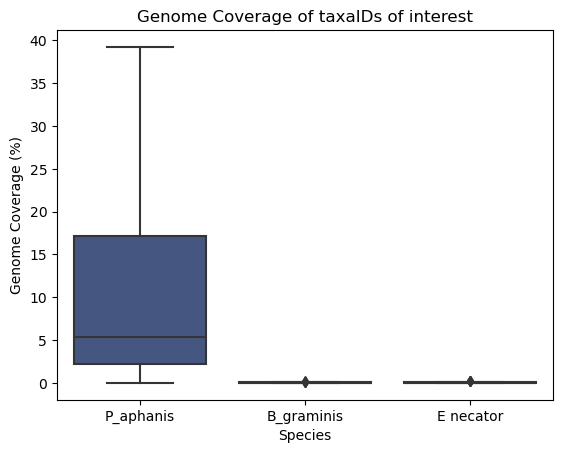

In [35]:
# Add Species based on taxaID
filtered_coverage['Species'] = filtered_coverage['taxaID'].map({79252: 'P_aphanis', 34373: 'B_graminis', 52586: 'E necator'})

# Plot the coverage of the taxaIDs of interest as a boxplot
sns.boxplot(
    x='Species', 
    y='coverage_percentage', 
    data=filtered_coverage,
    palette='viridis')

plt.title('Genome Coverage of taxaIDs of interest')
plt.ylabel('Genome Coverage (%)')
plt.xlabel('Species')


In [37]:
mildew_coverage = coverage[coverage['taxaID'] == 79252]
mildew_coverage.describe()

,Barcode,taxaID,mapped_bases,genome_length,coverage_percentage,num_reads
count,47.000000,47.0,4.700000e+01,47.0,47.000000,47.000000
mean,24.191489,79252.0,5.679312e+06,55605580.0,10.213566,7264.893617
std,13.985456,0.0,6.039585e+06,0.0,10.861471,7433.847305
min,1.000000,79252.0,1.720000e+03,55605580.0,0.003100,2.000000
25%,12.500000,79252.0,1.210644e+06,55605580.0,2.177200,1973.500000
50%,24.000000,79252.0,2.960455e+06,55605580.0,5.324000,4489.000000
75%,35.500000,79252.0,9.522438e+06,55605580.0,17.125000,11400.000000
max,48.000000,79252.0,2.182008e+07,55605580.0,39.240800,27357.000000


In [41]:
mildew_coverage[mildew_coverage['Barcode']== 3]

,Barcode,taxaID,mapped_bases,genome_length,coverage_percentage,num_reads
46,3,79252,9509697,55605580,17.1021,11567


## Looking at the coverage from all the reads mapped as one

- Initially data from combined read through pipeline to emergent pathogen database outpu as PAF
- Follow up SAM output of all reads just to *P aphanis* refernce

In [3]:
comb_coverage = pd.read_csv('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Tiptree/Mildew/Pipeline_Output/genome_coverage_comb.txt', sep='\t')  
comb_coverage.sort_values(by='coverage_percentage', ascending=False).head(5)

,taxaID,mapped_bases,genome_length,coverage_percentage,num_reads
108,79252,266927647,55605580,480.0375,341450
278,1592451,2546180,23602720,10.7877,2628
0,5599,2564608,32990834,7.7737,2610
217,167740,2543938,34346950,7.4066,2653
112,29001,2050465,31036461,6.6066,2082


SAM coverage output 

`samtools depth -a comb_mapped.sorted.bam > coverage.txt`

In [11]:
depth = pd.read_csv("/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Tiptree/Mildew/coverage.txt",
                     sep='\t',  names=["Contig", "Position", "Depth"])

depth['Contig'].nunique()

12319

In [14]:
overall_avg_depth = depth["Depth"].mean()
overall_max_depth = depth["Depth"].max()
overall_min_depth = depth["Depth"].min()
print(f"Overall Average Genome Coverage: {overall_avg_depth:.2f}x")
print(f"Overall Maximum Genome Coverage: {overall_max_depth:.2f}x")
print(f"Overall Minimum Genome Coverage: {overall_min_depth:.2f}x")



Overall Average Genome Coverage: 26.24x
Overall Maximum Genome Coverage: 9595.00x
Overall Minimum Genome Coverage: 0.00x


In [ ]:
# Aggregate coverage by contig
contig_coverage = depth.groupby('Contig')['Depth'].sum().reset_index()

In [26]:
contig_coverage.describe()

,Depth
count,1.231900e+04
mean,1.183509e+05
std,3.283012e+05
min,4.700000e+01
25%,1.062300e+04
50%,4.000500e+04
75%,1.271570e+05
max,1.401932e+07


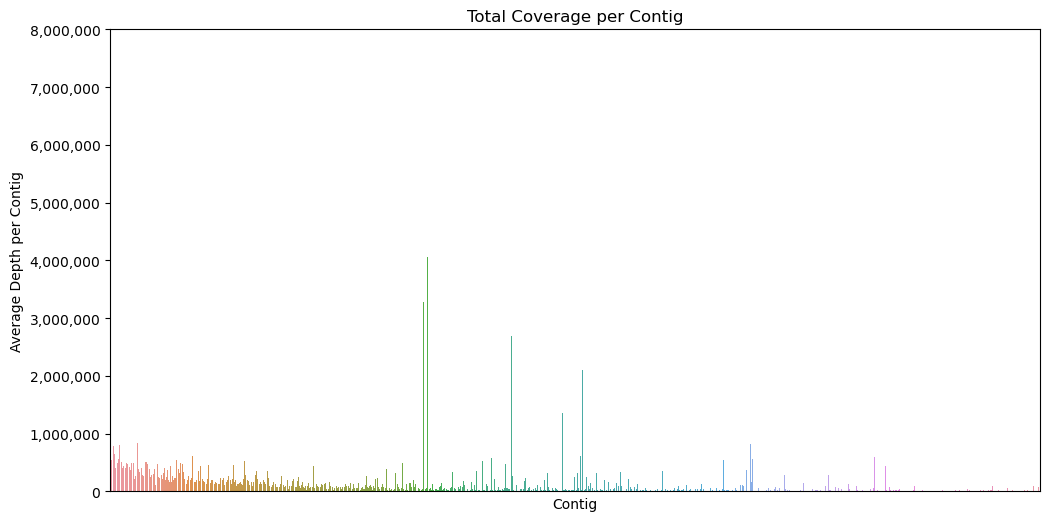

In [32]:
from matplotlib.ticker import MaxNLocator

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Contig', y='Depth', data=contig_coverage)
plt.title('Total Coverage per Contig')
plt.xlabel('Contig')
plt.ylabel('Average Depth per Contig')
plt.xticks([])  # Remove x-axis labels
plt.ylim(0, 8000000)  # Set y-axis limits
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis with commas
plt.show()


Try plotting with bins - but I want to see all the contigs not just one and there are 12k

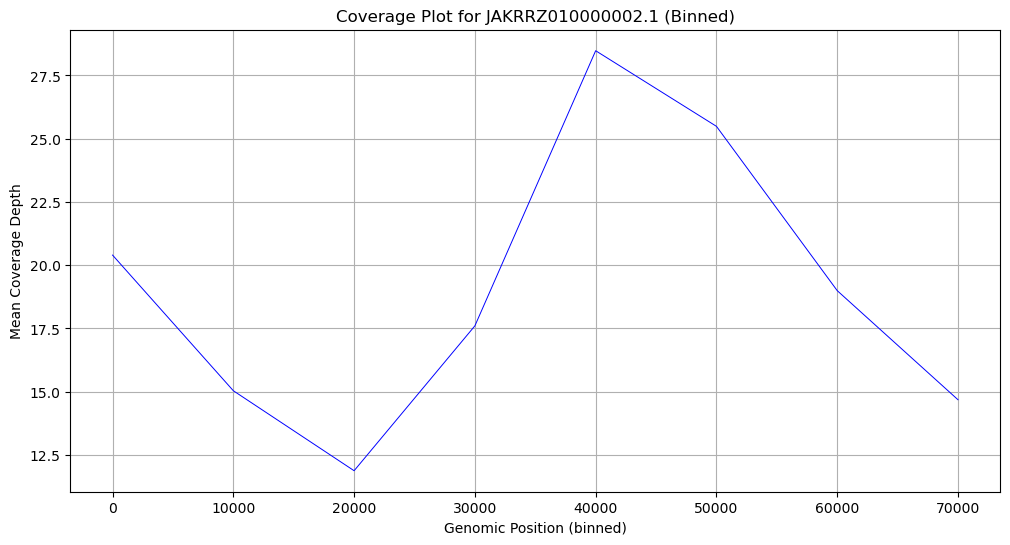

In [ ]:

# Define bin size (e.g., 10,000 bp)
bin_size = 10000
depth["Bin"] = (depth["Position"] // bin_size) * bin_size  # Create bins

# Aggregate: Average depth per bin
binned_coverage = depth.groupby(["Contig", "Bin"])["Depth"].mean().reset_index()

# Plot one contig
contig_name = depth["Contig"].unique()[0]  # Pick a contig
df_contig = binned_coverage[binned_coverage["Contig"] == contig_name]

plt.figure(figsize=(12, 6))
plt.plot(df_contig["Bin"], df_contig["Depth"], color="blue", linewidth=0.7)
plt.xlabel("Genomic Position (binned)")
plt.ylabel("Mean Coverage Depth")
plt.title(f"Coverage Plot for {contig_name} (Binned)")
plt.grid(True)
plt.show()
